##Content
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.


##Problem Statement
You own the mall and want to understand the customers like who can be easily converge (Target Customers) so that the sense can be given to marketing team and plan the strategy accordingly.

##Inspiration
By the end of this case study , you would be able to answer below questions.
  

1.   How to achieve customer segmentation using machine learning algorithm (KMeans Clustering) in Python in simplest way.
2.   Who are your target customers with whom you can start marketing strategy (easy to converse)
3. How the marketing strategy works in real world




#Importing Libraries


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading and Exploration

In [24]:
df = pd.read_csv('./Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


-------> We notice that there are no null-values.

In [26]:
# prompt: change the name of the column 'Annual Income (k$)' to annual_income     and the column 'Spending Score (1-100)' to 'spending_score'

df = df.rename(columns={'Annual Income (k$)':'annual_income', 'Spending Score (1-100)':'spending_score'})
df.columns = df.columns.str.lower()

df


,customerid,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Since we're grouping customers based on their purchase history , we conclude:

Age and gender should be excluded from our analysis. Annual income is a stronger predictor of spending habits than age. Including both would introduce redundancy. Gender's impact on overall segmentation is expected to be minimal compared to income. Focusing solely on income will provide a clearer picture of customer spending patterns. And of course spending_score is very essential for our analysis because it's not only about how much money this customer has , but also how much they would spend in our mall from that money.

In [27]:
df = df.drop(columns=['gender', 'age'])
df.head()

,customerid,annual_income,spending_score
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


In [33]:
X = df.iloc[:,[1,2]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

#K-Means Clustering

##Choosing the best number of clusters : Elbow method

Within-Cluster Sum of Square (WSS) :

We calculate the k-means clustering algorithm for different values
of k (the number of clusters).
For instance, by varying k from 1 to 10 clusters.

In [40]:
from sklearn.cluster import KMeans

wss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X)

  wss.append(kmeans.inertia_)

wss


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37265.86520484345,
 31248.853151807467,
 25029.25342493588,
 21829.135638779822,
 19641.456216651564]

##Plotting the elbow graph

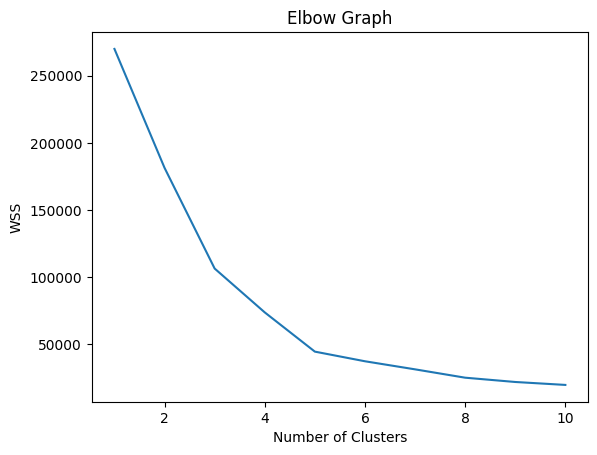

In [55]:
plt.plot(range(1,11), wss)
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')
plt.show()

So the best number of clusters is 5

#Model Training

In [56]:
kmeans = KMeans(n_clusters=5)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 1 4 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 0 3 1 3 0 3 0 3 1 3 0 3 0 3 0 3 0 3 1 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


##Plotting the clusters

In [73]:
kmeans.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

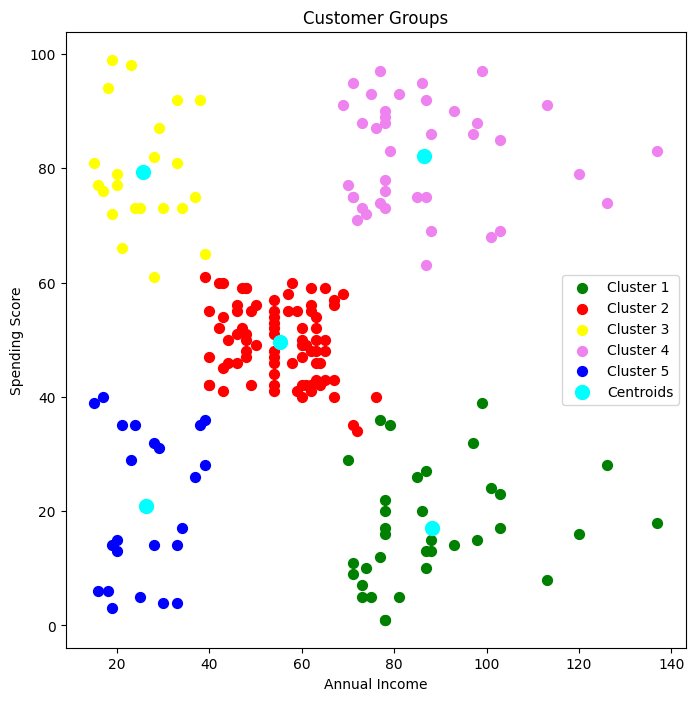

In [74]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.legend()
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

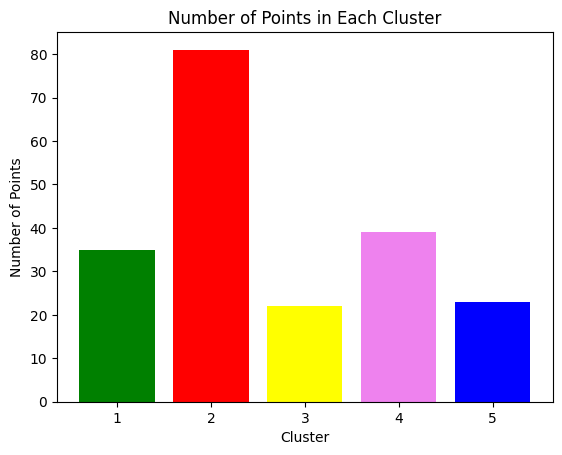

In [78]:
# Count the number of points in each cluster
cluster_counts = np.bincount(Y)

# Create a bar plot
plt.bar(range(1,6), cluster_counts, color=['green', 'red', 'yellow', 'violet', 'blue'])
plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.title('Number of Points in Each Cluster')
plt.show()


#Conclusion ⬇

##Majority class:
Cluster 2, characterized by moderate annual income and spending score, is our largest customer segment, comprising 42% of our customer base. This segment represents our most stable customer foundation.

##Target classes:
Clusters 1 (high income, low spending) and 5 (low income, low spending) emerge as our primary target segments.

1. Cluster 1: Despite even distribution across high-income clusters, this segment demonstrates a pronounced preference for luxury brands.
2. Cluster 5: This group exhibits a strong inclination towards value-oriented products.

##Recommendations:
To optimize marketing efforts:

1. Cluster 1: Develop a targeted luxury campaign emphasizing exclusivity and lifestyle benefits.
2.Cluster 5: Implement strategies focused on affordability, such as product bundling and loyalty programs.

###By concentrating on these key segments and tailoring our approach accordingly, we can effectively enhance customer acquisition and retention.